# TASK-1: Prediction using Supervised ML

To apply Linear regression and predict the percentage of a students based on the number of hours studied.

#### Submitted by Karmanya Mendiratta

------------

### Importing the libraries

These are the libraries that we will make use of to complete the task.

In [1]:
import pandas as pd
import numpy as np
import plotly
from plotly.offline import init_notebook_mode, plot, iplot

In [2]:
init_notebook_mode(connected=True)

In [3]:
import plotly.graph_objs as go
from plotly import subplots

### Retrieving the Dataset

In [4]:
df=pd.read_csv("student_scores.csv")

In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
print("number of entries:", len(df))

number of entries: 25


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Let's plot our data points on a graph to visualize our dataset and try and find a relationship between the data.

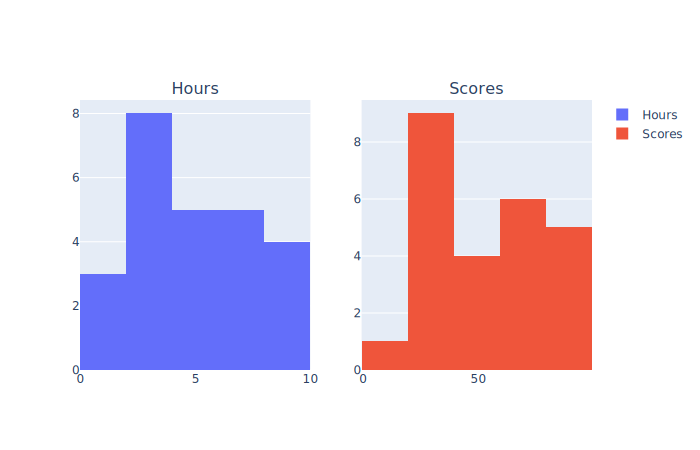

In [9]:
trace1=go.Histogram(x=df.Hours,
                    name='Hours')
trace2= go.Histogram(x=df.Scores,
                     name='Scores')

fig=subplots.make_subplots(rows=1,
                           cols=2,
                           subplot_titles=('Hours', 'Scores'))

fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)

fig.show('svg')

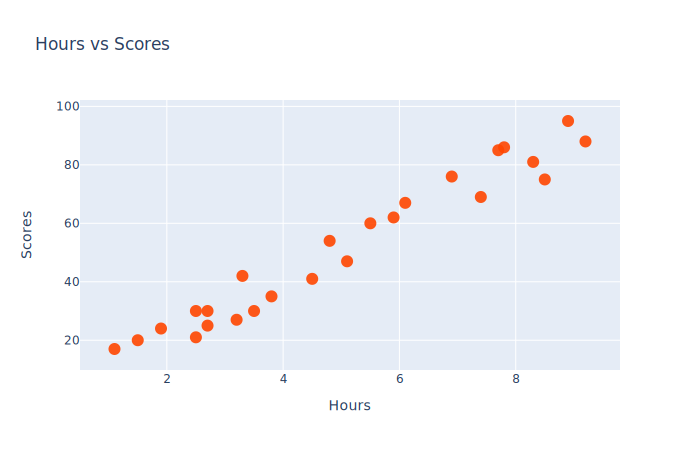

In [10]:
trace=go.Scatter(x=df.Hours,
                y=df.Scores,
                mode='markers',
                marker=dict(size=12, color='rgba(255,70,0,0.9)'))

data=[trace]

layout={'title':'Hours vs Scores',
       'xaxis':{'title':'Hours', 'zeroline':False},
       'yaxis':{'title':'Scores', 'zeroline':False}}

fig=go.Figure(data=data, layout=layout)

fig.show('svg')

From the graph we can see that there's a continuous distribution of data and there is a positive relation between no of hours studied and the score obtained.

### Splitting our dataset into training and test dataset 

We will split our dataset into training and test datasets. Training data will be used to train our model and the testing data will be used to check how accurate our model is.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X=df.drop("Scores", axis=1)
Y=df["Scores"]

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.33, random_state=42)

### Creating our Model and Obtaining predictions

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
#Fitting Model
model=LinearRegression()
model.fit(X_train,Y_train)

r_sq=model.score(X_train, Y_train)
print('Coefficient of Determination(R^2):', r_sq)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

Coefficient of Determination(R^2): 0.9543348637719865
intercept: 3.4050301755918895
slope: [9.65029083]


Since our R^2 value is high, the model obtained is accurate

In [15]:
#Obtaining predictions
prediction=model.predict(X_test)

In [16]:
print(X.Hours)

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64


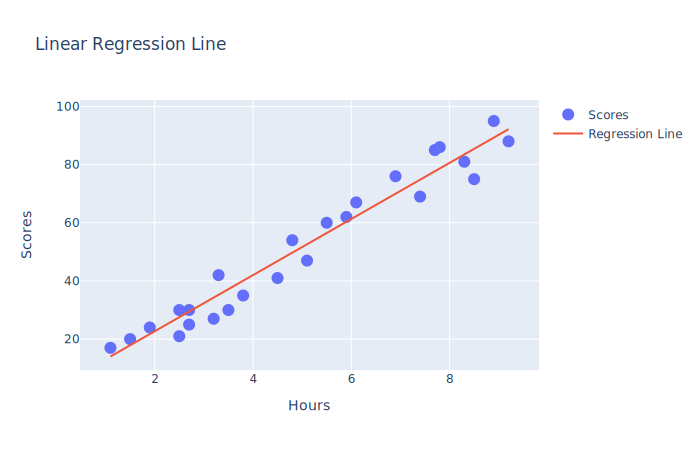

In [17]:
#Linear Regression Equation
Regression_eq=model.intercept_+model.coef_*X

#Obtaining Regression Line
trace1=go.Scatter(x=X.Hours,
                  y=Y,
                  mode='markers',
                  marker=dict(size=12),
                  name='Scores')


trace2=go.Scatter(x=X.Hours,
                  y=Regression_eq.Hours,
                  mode='lines',
                  name='Regression Line')

data=[trace1, trace2]

layout={'title':'Linear Regression Line',
       'xaxis':{'title':'Hours', 'zeroline':False},
       'yaxis':{'title':'Scores', 'zeroline':False}}

fig=go.Figure(data=data, layout=layout)

fig.show('svg')

In [18]:
prediction

array([83.50244409, 27.53075726, 27.53075726, 69.99203692, 60.34174609,
       29.46081542, 35.25098992, 52.62151342, 40.07613534])

In [19]:
#Comparing Actual vs Predicted values
compare=pd.DataFrame({"Actual":Y_test, "Predicted":prediction})
compare

,Actual,Predicted
8,81,83.502444
16,30,27.530757
0,21,27.530757
23,76,69.992037
11,62,60.341746
9,25,29.460815
13,42,35.250990
1,47,52.621513
22,35,40.076135


### Evaluating the Model

In [20]:
from sklearn.metrics import mean_absolute_error

In [21]:
print("Mean Absolute Error: ", mean_absolute_error(Y_test, prediction))

Mean Absolute Error:  4.564015037730867


### Making predictions using User Input

- What will be predicted score if a student studies for 9.25 hrs/ day?

In [22]:
hour=[[float(input('Enter number of hours studied:'))]]
own_pred= model.predict(hour)

print("No of hours studied: ", hour)
print("Estimated score:", own_pred[0])

Enter number of hours studied: 9.25


No of hours studied:  [[9.25]]
Estimated score: 92.67022037739972
